## Module Name: Programming for Data Analysts
#### Programme: MSc Applied Data Analytics 
#### Date: 24/01/2022
#### Author: Katarzyna Kowalska
---

#### Defining the problem 
> -  Create a Predictive model which can tell if  loan application is iniatialy aporved.
### **Current Sytuation**   

> - Strong online marketing - probably marketing team has accounts on social platforms. Posts will have a link to a lenders proviner webside where the applicant fils the form. This means that the "Zappy Financial Services" must have an existing server and infrastucture in place to support online presence. 

#### Counsultancy Note 1
> - If comapny is loocking to scale-up in the future, infratructure must be reviewed.  

#### Counsultancy Note 2
> - Company may need to re-think how long they would like to store clients data for (in both cases - dissaproval, aproval). This will have an impact on running cost of the company. Code would need to include some time of timer since creation of request to add data onto the server. 

#### Counsultancy Note 3
> - Skills shortages - fully automated web based loan service, could potentialy reduce the HR requirment to maintanace + QC team. This posseses advantages: reduced operational costs for relativley small upfront cost. Disadvantages: ethics. 

#### Counsultancy Note 4
> - Longer loan approval times - Counsultancy Note 3 resolves the problem 

#### Counsultancy Note 4
> - Increased potential operational and control risk.
> - Need to think about the securint of the webside etc if fully automated service. 
> - FAC rules need to be followed.
> - Client should re-think employee access to database


#### Available Reasources

> - Data: ‘Loans_Database_Table.pdf’, ‘Zappy Loan Data.xlsx’

#### **‘Loans_Database_Table.pdf’**

> - File no. 1. is a PDF generated by the ERP (Enterprise Reasourse Planning) database and contains:

> - All loan records from the previous year

> - Includes a status field for each application, allowing us to map inputs to outcomes for a possible supervised machine learning exercise.

#### **‘Zappy Loan Data.xlsx’**

> - Excel file is a spreadsheet generated from general data base accessible to sales team
> - Location in shared folder which increases duplication and missing values. Because sales team is working on an in-house database, they can not see who is edditing the file . If an employee forgets to save data or multiple emploees are working on the same custumer account, this can result in duplication of values and missing values. Transfer of database to cloud would resolve this problem as it would allow sales team to see the changes made to database, instanly. It also autonalicly saves changes which would prevent missing data. 



#### Setting up Project, Enviroment and installing libraries


##### To install nessesery pacages, push following command in command prompt. If problems occour, please check if the current python enviroment is running in the same location as the installed pacages. If not then PATH needs to be added in system enviroments (Follow this: https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/) 
1. --pip install os 
2. --pip install shutil
3. --pip install matplotlib
4. --pip install tabula
4. --pip install pandas
4. --pip install numpy
4. --pip install scipy
4. --pip install sklearn

#### Libraries

##### Operation System

In [1]:
# Operation System library provides methods for using operating system dependent 
# functionality such as; identifying and manipulating paths. 
import os 

# Walk provides names of files and directories, present in given directory.
# It's used to map the repository.
from os import walk 


# Shutil library provides methods for copping the content of source file to destination 
# file or directory.
import shutil

##### Data Visualisation

In [2]:
# Libraries used for data visualisation.
from matplotlib import pyplot as plt            # Collection of methods to plot graphs.

##### Data manipulation

In [3]:
# Libraries used for data maniputlation.

import tabula as tb                             # Python wrapper of a tabula-java module that  reads PDF files and converts them to CSV, TS or JSON as "tb".
import pandas as pd                             # Used for data manipulation and analysis as "pd". 
import numpy as np                              # Module supporting arrays and matrices as "np".

# Pickle library provides methods for serializing/deserializing Python objects. 
# It converts Python object into a byte stream to store it in a file/database etc. 
import pickle


##### Statistics

In [4]:
# Libraries used for statistical operations. 

# Perform one-way ANOVA.
from scipy.stats import f_oneway

# Chi-square test of independence of variables in a contingency table
from scipy.stats import chi2_contingency

##### Machine Learning


In [5]:

# Libraries used for machine learning models.
# Sklearn Library consists of predictive tools for data analysis.


# Method splits data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split           

# Method to Perform the evaluation, taking the dataset and cross-validation 
#configuration and returning a list of scores calculated for each fold.
from sklearn.model_selection import cross_val_score


# From processing object, import library for transformation of features 
# by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Logic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# xgboost classifier
from xgboost import XGBClassifier

# adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

#### Repository mapping

In [6]:
# veriiable takes string value of th current dir path 
currpath = os.getcwd()   
# veriable takes string value of dir path with all generated spreadsheets by sales team                    
sales_database = currpath + "\\SalesDatabase" 
# veriable takes syting value of dir path that holds all generated PDF's from ERS system
ERPDB = currpath + "\\ERPDB"
# veriable takes string value of dir path with all processed/output data         
output_path = currpath + "\\ProcessedData"     

fig_path = currpath + "\\VisualAnalysisPlots"   

#### ***A. Load and extract loan data***

#### Functions

##### Method to map the contents of repisatory: look_for_files()

In [7]:
# Function used for mapping 
# This function returns file names and file paths of all files 
# with user specified directory path and file extencison ('.pdf' or '.xls')

def look_for_files(directory_path = str,                  # comulsory argument 
                    file_extention = str):                # comulsory argument

    # os.walk() against specified directory path, 
    # returns all files with specified file extension 
    files = next(walk(directory_path))[2] # [0] returns path, [1] returns all dirs, [2] returns all files
    
    # Inatialising local veriables to hold data about the found files - name and path
    filenames = []
    filepaths = []

    # Itterating through each element in array holding all file names
    for i in files:
        # splits file name into name and extension 
        ext = os.path.splitext(i)[1]
        # if extension of the file matches with extension provided by user
        if ext == file_extention:
            # file names are appended to local veriables
            filenames.append(i)
            # path of the file  
            path = os.path.join(directory_path, i)
            # path is appended to the global array of file paths
            filepaths.append(path) 

    # return all file data for a given directory and extension
    return filenames, filepaths

##### Method to convert PDF/Excel files: file_to_CSV()

In [8]:
# This method converts all or only specified pdf/csv files from a given repisotary with
# specified extension.
# It does not support any other extension.

def file_to_CSV(

    input_dir_path=str,
    input_file_extension=str,
    output_dir_path=str,
    out_ext=str,
    all=bool,
    specific_file_name=str

    ):

###################################### PDF files #######################################
    
    ################################## All files ###################################
    if input_file_extension == ".pdf" and all == True:

        # file_name_and_path holds array with 2 elements.
        # Element at index 0 = file names with specified extension.
        # Element at index 1 = full file paths with specified extension.
        file_name_and_path = look_for_files(input_dir_path, input_file_extension)
        
        
        for full_file_name in file_name_and_path[0]:
            for path in file_name_and_path[1]:
                # file name without extension 
                pure_input_file_name = os.path.splitext(full_file_name)[0]
                # converted file name 
                output_file_name = pure_input_file_name + out_ext
    
                # Converts all pdf data tables to csv.
                # Data is saved to the current directory. 
                tb.convert_into(path,
                            output_file_name, 
                            pages="all", 
                            stream=True)
            
                # move converted file into output directory 
                shutil.move(output_file_name, 
                output_dir_path + "\\" + output_file_name)

    ################################## Specific file ##################################
    if input_file_extension == ".pdf" and all == False:
        # full path for specified file name
        file_input_path = input_dir_path + "\\" + specific_file_name + input_file_extension   
        # file name without extension 
        pure_input_file_name = os.path.splitext(specific_file_name)[0]
        # converted file name 
        output_file_name = pure_input_file_name + out_ext
        
        # Converts specified pdf file to csv.
        # Data is saved to the current directory.         
        tb.convert_into(file_input_path, 
            output_file_name,
                pages="all", 
                stream=True)

        # move converted file into output directory 
        shutil.move(output_file_name, 
            output_dir_path + "\\" + output_file_name)

####################################### Excel files #######################################


    ################################## All files ###################################
    
    if input_file_extension == ".xlsx" and all == True:
        # file_name_and_path holds array with 2 elements.
        # Element at index 0 = file names with specified extension.
        # Element at index 1 = full file paths with specified extension.
        file_name_and_path = look_for_files(input_dir_path, input_file_extension)
        
        # for each fould file
        for full_file_name in file_name_and_path[0]:
            for path in file_name_and_path[1]:
                # file name without extension 
                pure_input_file_name = os.path.splitext(full_file_name)[0]
                # converted file name 
                output_file_name = pure_input_file_name + out_ext

                # veriable excel_data holds the data*
                excel_data = pd.read_excel(path,'Sheet1', index_col=0)
                # excel to csv 
                excel_data.to_csv(output_file_name, encoding='utf-8')
                
                # move converted file into output directory 
                shutil.move(output_file_name, output_dir_path + "\\" + output_file_name)

    ################################## Specific file ##################################
    if input_file_extension == ".xlsx" and all == False:
        
        output_file_name = specific_file_name + out_ext
        # veriable excel_data holds the data
        input_file_path = input_dir_path + "\\" + specific_file_name + input_file_extension
        # veriable excel_data holds the data*
        excel_data = pd.read_excel(input_file_path,'Sheet1', index_col=0)
        # excel to csv 
        excel_data.to_csv(output_file_name, encoding='utf-8')        
        # move converted file into output directory 
        shutil.move(output_file_name, output_dir_path + "\\" + output_file_name)
    # else:
    #     print("ERROR: Method file_to_CSV does not support specified extension.")



#### Method to insert csv data into a dataframe: extract_raw_conv_data()

In [9]:
# This function extracts csv data from all converted 
# to csv files in output_data directory
# and returns array of all data frames created

def csv_data_to_dataframe(dir):
    # get all files
    filenamepath = look_for_files(dir, ".csv") 
    
    # error message if no file found
    error_mes = "No files."

    # extract and load all dataframes 
    dfs = []
    
    # for a string path in a array of strings
    for path in filenamepath[1]:
        # read csv data into a data frame
        df = pd.read_csv(path)
        # removing duplicate rows if any
        #print(df.shape) # dataframe shape after droping duplicates 
        df = df.drop_duplicates()
        #print(df.shape) # dataframe shape after droping duplicates 
        # append data frame to the all data frames
        dfs.append(df)
    
    # if no ellement is found in any array 
    if len(dfs) == 0:
        print(error_mes)

    # return all created data frames
    return dfs

#### Main Task

#### Converting PDF files to CSV

In [10]:
file_to_CSV(

    input_dir_path=ERPDB,
    input_file_extension=".pdf",
    output_dir_path=output_path,
    out_ext=".csv",
    all=False,
    specific_file_name= "Loans_Database_Table"

)

#### Converting Excel files to CSV

In [11]:
file_to_CSV(

    input_dir_path=sales_database,
    input_file_extension=".xlsx",
    output_dir_path=output_path,
    out_ext=".csv",
    all=False,
    specific_file_name= "Zappy Loan Data"

)

#### Loading all files to dataframes

In [12]:
# iniatialising an array to load multiple dataframes
dfs = []

# itterating over extracted data frames from csv files in ProcessedData
for i in csv_data_to_dataframe(dir = "ProcessedData"):
    # appends the files to dfs array
    dfs.append(i)



#### ***B. Preparing and cleaning the loan data***

#### Functions

##### Method for checking if dataframe data fields are the same: set_df()

In [13]:
# Functions aims to check if data fields are the same for the loaded dataframes

def set_df(dfs):
    # Iniatialisation of empley array.
    objs = []

    for i in dfs:
        # Sets index of each dataframe to be loan ID.
        i.set_index("Loan_ID")
        i.sort_index(axis=1)
        
        # Gets name of data fields and appends them to the array of abstract objects.
        cols = i.columns
        objs.append(cols) 

    # Check if the names are the same.
    result = np.where(objs[0] != objs[1], 'False', 'False')
    if i in result == "True":
        return print("Columns do not match.")
    else:
        return print("Data frames asserted and checked sucessfully")

##### Method for sorting datafields into Categorical/Qualitative based on the value they hold: sort()

In [14]:
# Function aims to sort the data fields into two categories: qualative and quantrative. 
# Number of unique elements in a qualative data field is expected to be <20 (many different values)
# Number of unique elements in a categorical data field is expected to be >20 (only few cats)

def sort(dfname):
    cols = dfname.columns

    # gets and stores number of uqniue elements
    df_unique_val = dfname.nunique()

    cat_cols = []
    con_cols = []

    # Itterates over the data, taking its index and value
    for idx, val in enumerate(df_unique_val):

        if val <= 20:
            cols_name = cols[idx]
            cat_cols.append(cols_name)

        if val >= 20:
            cols_name = cols[idx]
            con_cols.append(cols_name)
    
    # Dictionary of sorted data fields
    obj = {"Categorical" : cat_cols,
        "Qualitative" : con_cols}
    
    return obj


##### Method to go fill missing data: fill_data()

In [15]:
# This method aims to fill missing data using mode and median of the data fields in question

def fill_data(df, cat):
    # Get collumns.
    cols = df.columns
    # Get info where the missing data is located.
    miss_data = df.isnull().sum()
    
    # Local veriable holding.
    miss_cols = []

    for idx, val in enumerate(miss_data):
        if val != 0:
            # Get column name at the same index.
            miss_cols.append(cols[idx])

    for i in miss_cols:
        if i in cat["Categorical"]:
            print(i)
            # Categorical data is filled my using mode of all values.
            df[i].fillna(df[i].mode()[0], inplace=True)

        if i in cat["Qualitative"]:
            # Qualitative data is filled my using mode of all values.
            df[i].fillna(df[i].median(), inplace=True)
    
    # Returns dataframe with filled values
    return df



##### Method for plotting Bar Charts: plot_bar_chart()

In [16]:
def plot_bar_chart(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

##### Available data

In [17]:
# asserts all dataframes to veriables with name representing dataframes posytion in array 
no_of_dfs = len(csv_data_to_dataframe(dir = "ProcessedData"))

# user is informed of no of data sets available
print("Number of available data files: " + str(no_of_dfs))

Number of available data files: 2


##### Main Task - Basic Data exploration

##### Checking if dataframes have the same fields

In [18]:
set_df(dfs)

Data frames asserted and checked sucessfully


##### Zipping dataframes together

In [19]:
df_zip = pd.concat(dfs, sort=True)
df_zip

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Gender,Graduate,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1,0,1,1,128,360,1002,Y,0,1,0
1,4583,1508.0,1,1,1,1,128,360,1003,N,1,3,0
2,3000,0.0,1,0,1,1,66,360,1005,Y,1,1,1
3,2583,2358.0,1,0,1,0,120,360,1006,Y,1,1,0
4,6000,0.0,1,0,1,1,141,360,1008,Y,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2900,0.0,1,0,2,1,71,333,2978,Y,0,3,0
243,4106,0.0,1,3,1,1,40,180,2979,Y,1,3,0
244,8072,240.0,1,1,1,1,253,333,2983,Y,1,1,0
245,7583,0.0,1,2,1,1,187,333,2984,Y,1,1,0


##### Sorted fields (categorogical/qualitative)

In [20]:
# View sum of unique values in each field
#df.nunique()

# sort data to categorogical/qualitative
cols_sort = sort(df_zip)

# dictionary key = sort name, value = name of the data field 
cols_sort

{'Categorical': ['Credit_History',
  'Dependents',
  'Gender',
  'Graduate',
  'Loan_Amount_Term',
  'Loan_Status',
  'Married',
  'Property_Area',
  'Self_Employed'],
 'Qualitative': ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_ID']}

In [21]:
# duplication drop

df_dirty = df_zip.duplicated() # gets no of duplicates

df_clean = df_zip.drop_duplicates()

print("Number of duplicates removed: " + str(len(df_zip) - len(df_clean)))


Number of duplicates removed: 3


In [22]:
df_clean.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Gender               0
Graduate             0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

In [23]:
df = fill_data(df_clean, cols_sort)
df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Gender               0
Graduate             0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

In [24]:
# you can see here the describe function makes no sece
#df.shape
df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Gender,Graduate,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Property_Area,Self_Employed
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,5370.386293,1609.445047,0.777259,0.735202,1.182243,0.783489,148.230530,334.439252,1997.070093,0.651090,1.959502,0.129283
std,6035.008001,2872.763920,0.416411,1.003103,0.386346,0.412188,86.301415,62.817346,554.745996,0.476997,0.788912,0.335775
min,150.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,12.000000,1002.000000,0.000000,1.000000,0.000000
25%,2875.000000,0.000000,1.000000,0.000000,1.000000,1.000000,101.250000,333.000000,1560.500000,0.000000,1.000000,0.000000
50%,3812.500000,1221.000000,1.000000,0.000000,1.000000,1.000000,128.000000,360.000000,1963.000000,1.000000,2.000000,0.000000
75%,5741.000000,2305.000000,1.000000,1.000000,1.000000,1.000000,168.000000,360.000000,2448.750000,1.000000,3.000000,0.000000
max,81000.000000,41667.000000,1.000000,3.000000,2.000000,1.000000,700.000000,480.000000,2990.000000,1.000000,3.000000,1.000000


##### Converting the binary nominal variable to numeric using 1/0 mapping

In [25]:
df['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


##### Conditional Percentage

In [26]:
def con_percentage(target, targetval, con, conval):
    
    # elements meeting condition
    x = df[df[con] == conval]
    
    # all target element in meeting the condition 
    y = x[x[target] == targetval]
    len(y.index)

    # all elements of target 
    z = df[df[target] == targetval]

    percent = len(y.index)/len(z.index)*100
    print("The percentage of " + str(targetval) + " in " + target + " is: " + str("{:.2f}".format(percent)) + "%")
    return percent


##### Average

In [27]:
def average(df, target):
    average = df[target].sum()/len(df)
    print("The average " + target + " is: £" + str("{:.2f}".format(average)))
    return average

##### Conditional Average

In [28]:
def con_average(df, target, comp_colum, value):
    val = df[df[comp_colum] == value][target].sum()  
    average = val/len(df)
    print("The average " + target + " is: £" + str("{:.2f}".format(average)))
    return average

#### Part B. Results 

In [29]:
con_percentage("Gender", 2, "Loan_Status", 1)

The percentage of 2 in Gender is: 68.38%


68.37606837606837

In [30]:
average(df, "ApplicantIncome")

The average ApplicantIncome is: £5370.39


5370.386292834891

In [31]:
con_average(df, "ApplicantIncome", "Self_Employed", 1)

The average ApplicantIncome is: £949.03


949.0342679127726

In [32]:
con_average(df, "ApplicantIncome", "Self_Employed", 0)

The average ApplicantIncome is: £4421.35


4421.352024922118

In [33]:
con_average(df, "ApplicantIncome", "Graduate", 1)

The average ApplicantIncome is: £4558.88


4558.884735202492

In [34]:
con_percentage("Graduate", 1, "Loan_Status", 1)

The percentage of 1 in Graduate is: 71.57%


71.57057654075547

#### Categorical data plots

In [35]:
# categorical variables: Bar plot
categorical = sort(df)["Categorical"]
# Uncomment to see a plot in this notebook
#plot_bar_chart(df, categorical)

# saving figure to VisualAnalysisPlots for audit purpuses and to send to stakeholders
#plt.savefig(fig_path + "\\" + 'categorical_data_fields.png')

#### Qualitative data plots

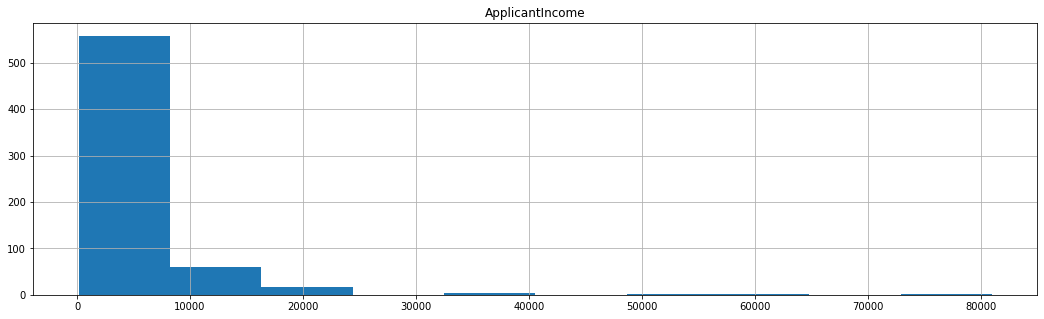

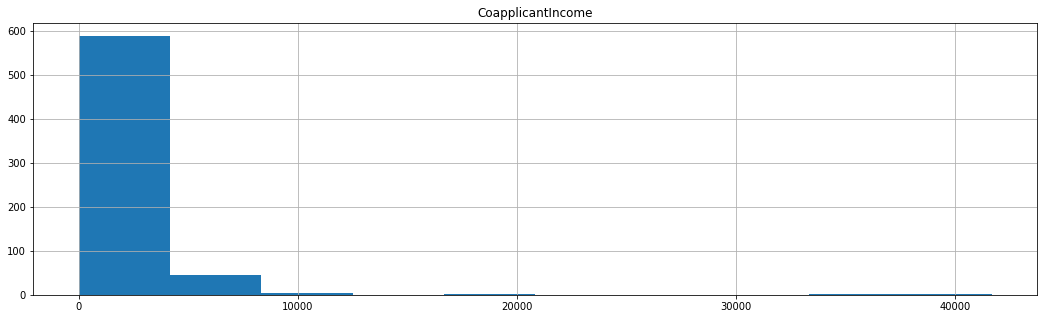

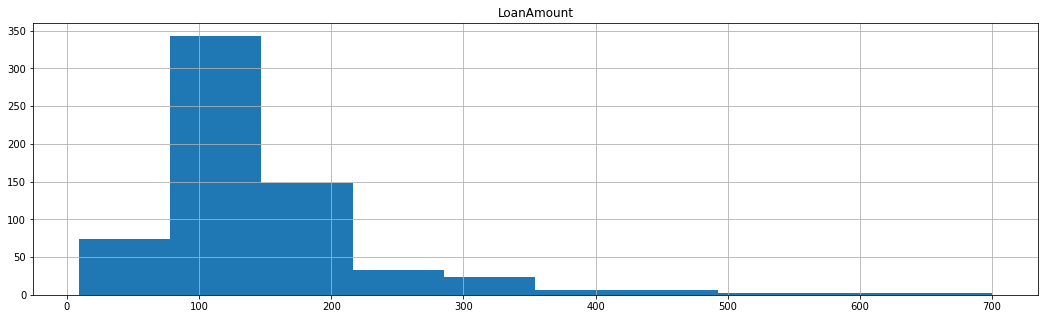

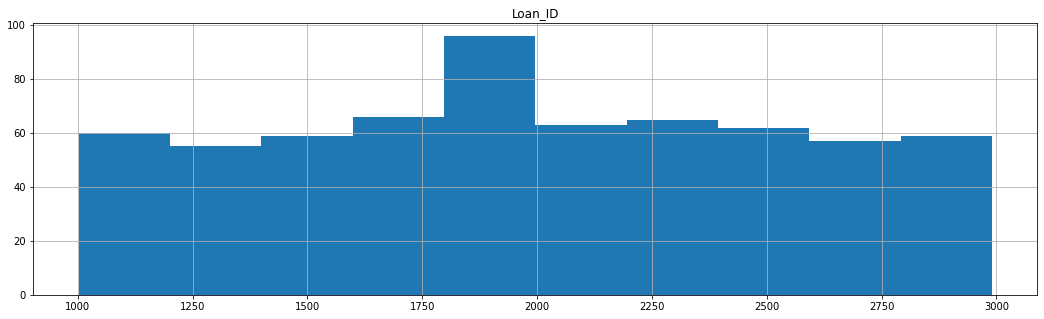

In [36]:
# continuous variables= Histogram
qualitative = sort(df)["Qualitative"]
for i in qualitative:
    df.hist([i], figsize=(18,5))
    # saving figure to VisualAnalysisPlots for audit purpuses and to send to stakeholders
    #plt.savefig(fig_path + "\\" + 'qalitative_data_field.png')


##### Analysis: 
1. Loan_Id Histogram does not follow normal distribution hence no stat data is valid and so it does not affect Loan_Status value. 
2. loan anount data skewed largley but still accepted
3. other data fields are accepted 
##### Action:
1. Drop Loan_Id colummn
3. Outliers - no need for loan amount 

#### Removing unnsesesery columns

In [37]:
UselessColumns = ['Loan_ID']
qualitative.remove('Loan_ID')
# df_dropped = df.drop(UselessColumns,axis=1)

#### Outliers

C:\Users\katarzyna.b.kowalska\AppData\Local\Temp\ipykernel_11548\2059352354.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[qualitative[1]][df[qualitative[1]]>20000] = 16000
C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\katarzyna.b.kowalska\AppData\Local\Temp\ipykernel_11548\2059352354.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

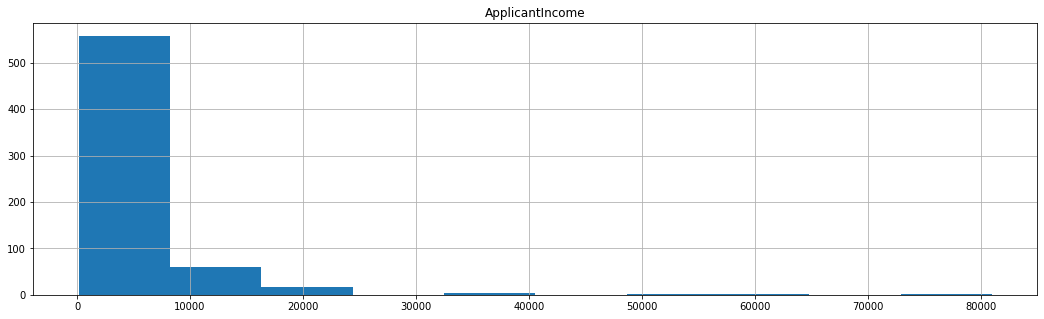

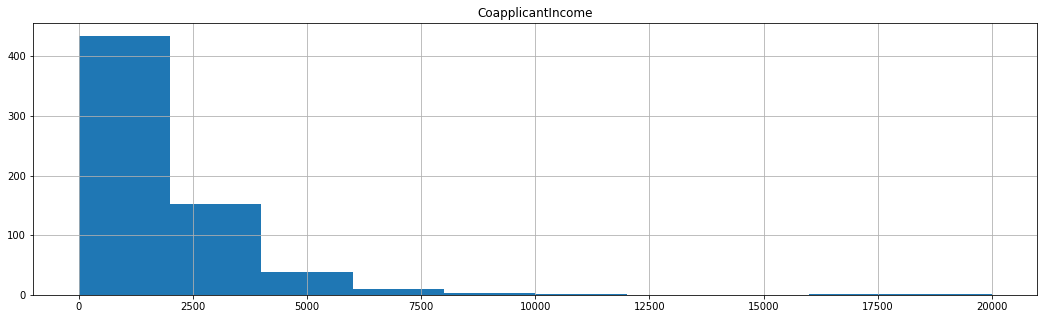

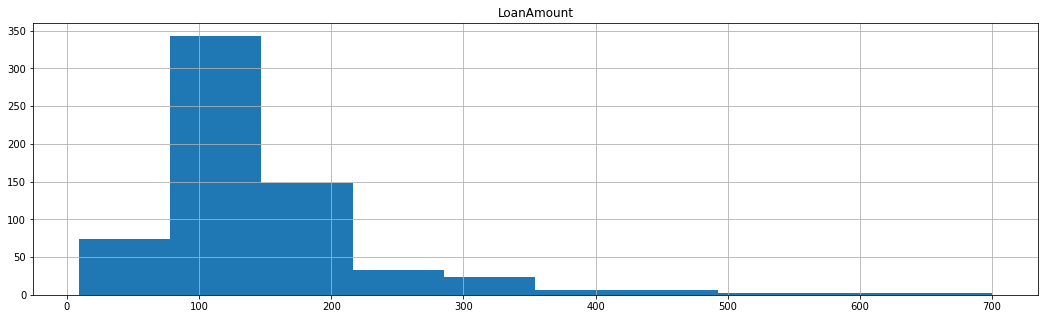

In [38]:
# machinebrakes - to many inputs compared to eachother -> needs to be qualative

# x = []
# for i in df1['ApplicantIncome']:
#     if 20000 < i < 30000:
#         x.append(x)

# y = np.array(x)
# print(y.min())

df[qualitative[1]][df[qualitative[1]]>15000].sort_values()
df[qualitative[1]][df[qualitative[1]]>20000] = 16000

df[qualitative[2]][df[qualitative[2]]>9000].sort_values()
df[qualitative[2]][df[qualitative[2]]>10000] = 9500

# visuialisation after removal of outliers
for i in qualitative:
    df.hist([i], figsize=(18,5))



#### Relationship Exploration: Categorical Vs Continuous -- Box Plots

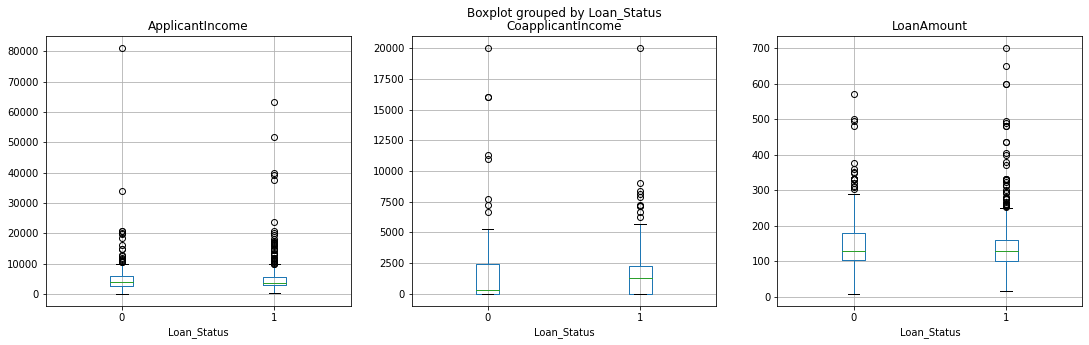

In [39]:
# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(qualitative), figsize=(18,5))
for PredictorCol , i in zip(qualitative, range(len(qualitative))):

    df.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Relationship Exploration: Categorical Vs Continuous using ANOVA test

In [40]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, predictorlist):

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in predictorlist:
        predictorlist=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*predictorlist)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(SelectedPredictors)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [41]:
qual_selected = FunctionAnova(df, 'Loan_Status', qualitative)
# all are corellated

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.8073055853515229
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.43281379335562953
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.1639208958113914


#### Relationship Exploration: Categorical Vs Categorical -- Grouped Bar Charts

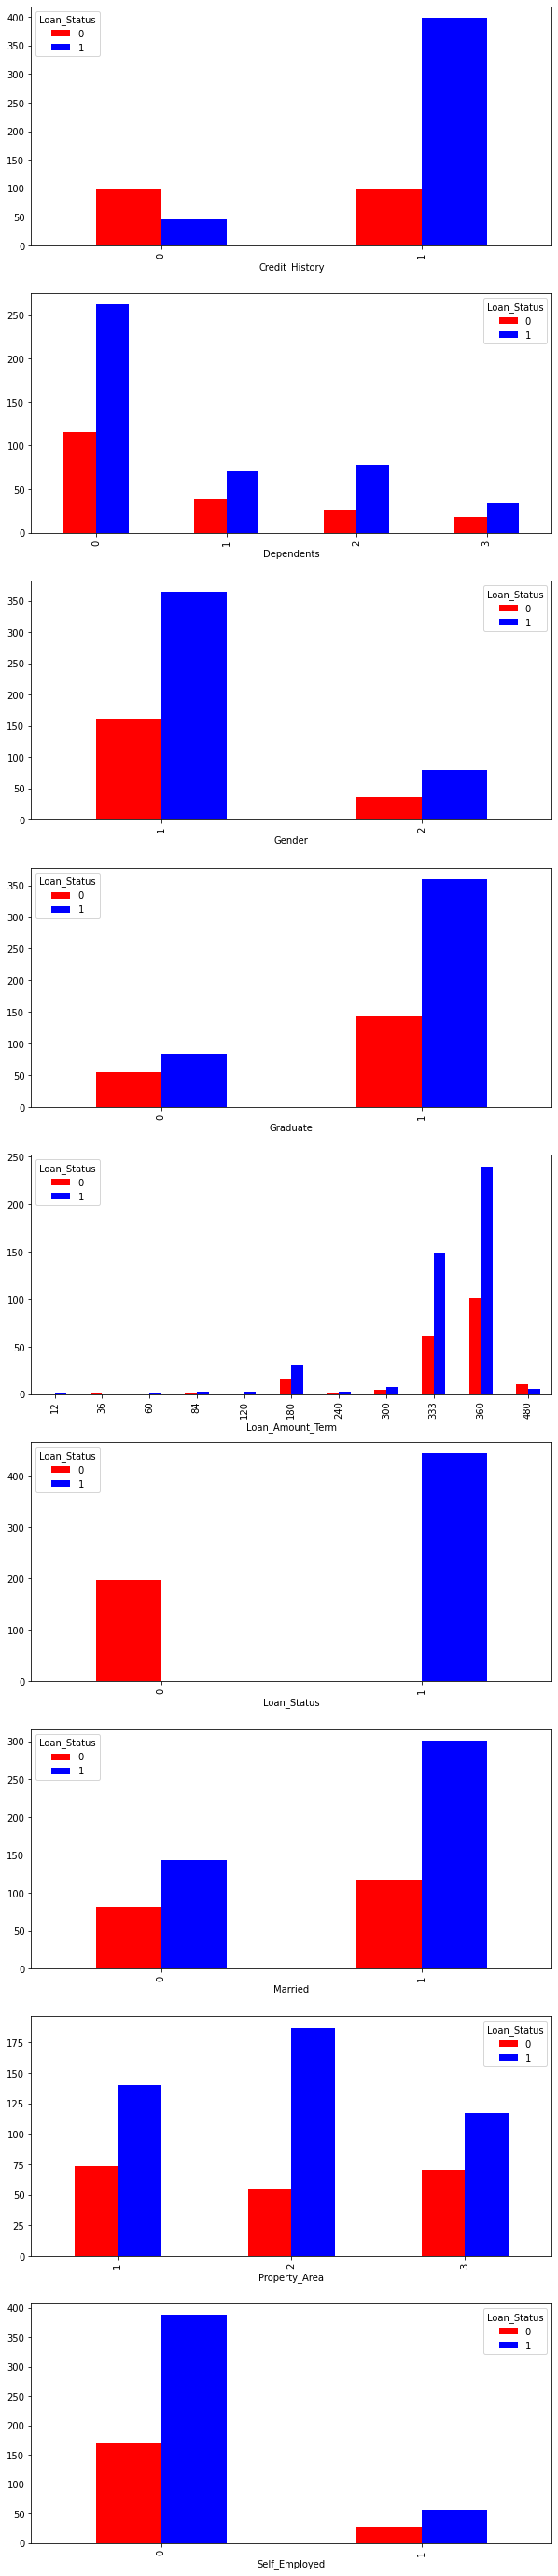

In [42]:

fig, PlotCanvas=plt.subplots(nrows=len(categorical), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(categorical, range(len(categorical))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])


#### Relationship Exploration: Categorical Vs Categorical using statistical approach      (Chi-test)

In [43]:
# Writing a function to find the correlation of all categorical variables with the Target variable
# using chi test.
def FunctionChisq(inpData, TargetVariable, predictorList):
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in predictorList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
         
    return SelectedPredictors

In [44]:
# Removing unnesesy columns form dictionary
# categorical.remove('Loan_Status')
print(categorical)
cat_selected = FunctionChisq(df,'Loan_Status', categorical)
cat_selected

['Credit_History', 'Dependents', 'Gender', 'Graduate', 'Loan_Amount_Term', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed']
Credit_History is correlated with Loan_Status | P-Value: 5.521126035975667e-28
Dependents is NOT correlated with Loan_Status | P-Value: 0.3961859737538591
Gender is NOT correlated with Loan_Status | P-Value: 0.9266484922805766
Graduate is correlated with Loan_Status | P-Value: 0.015811964247835205
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.06750268311564325
Loan_Status is correlated with Loan_Status | P-Value: 1.2786795631461287e-140
Married is correlated with Loan_Status | P-Value: 0.04067744922518829
Property_Area is correlated with Loan_Status | P-Value: 0.001974410204755085
Self_Employed is NOT correlated with Loan_Status | P-Value: 0.8183182970470555


['Credit_History', 'Graduate', 'Loan_Status', 'Married', 'Property_Area']

#### Final Selection

In [45]:
# All selected datafields
selected = cat_selected + qual_selected

selected.remove('Loan_Status')
print(selected)

['Credit_History', 'Graduate', 'Married', 'Property_Area']


In [46]:
# Setting Machine Learning dataframe to contain only selected datafields
MLdata = df[selected]
MLdata.head()
MLdata.shape

# Pickle converts Python object into a byte stream to store it in a file/database.
# Its stored for future devployment of the software. 
# Provides stability across the software. 
MLdata.to_pickle('CasheFiles\\MLdata.pkl')

#### ***D. ML Algorythm***

#### Model Data

In [47]:

#Predictors used by ML algorythms == name of the selected datafields
predictors = MLdata.columns
print(predictors) # reference

# Invokes values for predictors 
MLdata[predictors].values

#= gets values for predictors
X= MLdata[predictors].values
Y= df["Loan_Status"].values

# checking the length of each data field: must match 
if len(X) ==len(X):  
    print("Number of values in each dataframe match.")


Index(['Credit_History', 'Graduate', 'Married', 'Property_Area'], dtype='object')
Number of values in each dataframe match.


#### Train data 

In [48]:
# Generates and splits the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=428)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(449, 4)
(449,)
(193, 4)
(193,)


#### Sandardization  of data

In [49]:
# Standarisation and normalisation process 
# make sure that data is internally consistent; 
# that is, each data type has the same content and format.
# On this data Min Max Normalization produced better results

# Normalisation was chosen as it gave the best results

PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Modes

##### Logistic Regression

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data

metrics.classification_report(y_test, prediction)
metrics.confusion_matrix(y_test, prediction)

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the Logic Regression Model on Testing Sample Data: ' + str(round(F1_Score,10)) + "%")

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values1=cross_val_score(LOG, X , Y, cv=10, scoring='f1_weighted')
print('\nAverage Accuracy of the Logic Regression Model: ' + str(round(Accuracy_Values1.mean(),10)) + "%")

Accuracy of the Logic Regression Model on Testing Sample Data: 0.7464644421%

Average Accuracy of the Logic Regression Model: 0.7613420837%


##### AdaBoost

In [51]:

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,10))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values2=cross_val_score(AB, X , Y, cv=10, scoring='f1_weighted')
print('\nAverage Accuracy of the AdaBoost Model: ' + str(round(Accuracy_Values2.mean(),10)) + "%")


Accuracy of the model on Testing Sample Data: 0.7464644421

Average Accuracy of the AdaBoost Model: 0.7613420837%


##### XGBoost

[17:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of the model on Testing Sample Data: 0.7464644421
[17:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\katarzyna.b.kowalska\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Final Average Accuracy of the model: 0.7613420837


<AxesSubplot:>

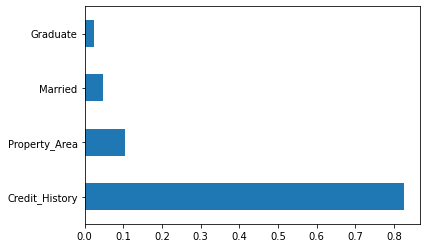

In [52]:
# Xtreme Gradient Boosting (XGBoost)

clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,10))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values3=cross_val_score(XGB, X , Y, cv=10, scoring='f1_weighted')
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values3.mean(),10))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(XGB.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')


##### Model Selection 

In [53]:
arr = []
arr.append(Accuracy_Values1.mean()) # "Logistic Regression"
arr.append(Accuracy_Values2.mean()) # "AdaBoost"
arr.append(Accuracy_Values3.mean()) # "XGBoost"
arr


[0.7613420837255125, 0.7613420837255125, 0.7613420837255125]

##### Deployment

In [54]:
# Using the Logic Regression algorithm as its the simples to implemnet

# Logic regression model 
model = LogisticRegression(solver='liblinear', random_state=0)

# Training the model on 100% Data available
FinalLRModel = model.fit(X, Y)



In [55]:
# saving model as a steralised file 
with open('CasheFiles\\LogicRegression.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalLRModel, fileWriteStream)
    # Cloasing the stream
    fileWriteStream.close()


In [56]:
def loan_approval_prediction(sample_data):

    Num_Inputs=sample_data.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the ML model training data
    MLdata=pd.read_pickle('CasheFiles\\MLData.pkl')
    input_data=sample_data.append(MLdata)
    
    # Treating the binary nominal variables first
    input_data['Married'].replace({'Y':1, 'N':0}, inplace=True)
    
    # generates input values to the model 
    X=input_data[predictors].values[0:Num_Inputs]    
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    with open('CasheFiles\\LogicRegression.pkl', 'rb') as fileReadStream:
        LGmodel=pickle.load(fileReadStream)
        fileReadStream.close()
            
    # Genrating Predictions
    
    Prediction= LGmodel.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

#### User interphace

In [57]:

print(predictors) # Reference for putting in sample data 

# Template for a new aplication
new_application = pd.DataFrame(

    # Sample data
    data=[[1, 1, "Y", 1],
    [0, 0, "N", 0]], 
    columns=predictors)


Index(['Credit_History', 'Graduate', 'Married', 'Property_Area'], dtype='object')


In [58]:
# Calling prediction function
loan_approval_prediction(new_application)

,Predicted Status
0,1
1,0
